In [127]:
import ROOT, os
ROOT.gROOT.SetBatch(True)
ROOT.gStyle.SetOptTitle(0)

# Signal modelling

In [78]:
f = ROOT.TFile("input_root/mc/2018/signal_Hbb.root", "r")
# Load TTree
tree = f.Get("Events")

# Define mass and weight variables
mass_Zprime = ROOT.RooRealVar("mass_Zprime", "mass_Zprime", 2000, 720, 3520)
weight = ROOT.RooRealVar("weight", "weight", 0, -2, 2)

# Convert to RooDataSet
mc = ROOT.RooDataSet("Events", "Signal_Hbb", tree, ROOT.RooArgSet(mass_Zprime, weight), "", "weight" )

# Lets plot the signal mass distribution
can = ROOT.TCanvas()
plot = mass.frame()
mc.plotOn(plot)
plot.Draw()
can.Update()
can.SaveAs("../plots/fit/signal_Hbb_mass_Zprime.pdf")

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass_Zprime) TTree Float_t branch mass_Zprime will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #884 because mass_Zprime cannot accommodate the value 3635.09
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #900 because mass_Zprime cannot accommodate the value 538.144
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #2822 because mass_Zprime cannot accommodate the value 604.632
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #2897 because mass_Zprime cannot accommodate the value 596.675
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(Events) Ignored 13 out-of-range events
[#1] INFO:InputArguments -- RooAbsData::plotOn(Events) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead

Info in <TCanvas::Print>: pdf file ../plots/fit/signal_Hbb_mass_Zprime.pdf has been created


[#0] WARNING:InputArguments -- The parameter 'sigmaL' with range [0, 200] of the RooCrystalBall 'model_signal_Hbb' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigmaR' with range [0, 200] of the RooCrystalBall 'model_signal_Hbb' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'alphaL' with range [0, 6] of the RooCrystalBall 'model_signal_Hbb' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'alphaR' with range [0, 6] of the RooCrystalBall 'model_signal_Hbb' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'nL' with range [0, 8] of the RooCrystalBall 'model_signal_Hbb' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'nR' with range [0, 8] of the RooCrystalBall 'model_signal_Hbb' exceeds the

Info in <TCanvas::Print>: pdf file ../plots/fit/model_signal.pdf has been created


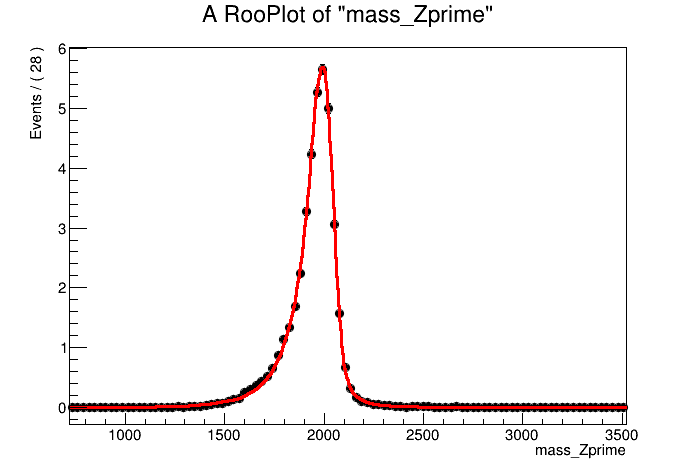

In [79]:
# Introduce RooRealVars into the workspace for the fitted variable
x0 = ROOT.RooRealVar("x0", "x0", 2000, 0, 4000)
sigmaL = ROOT.RooRealVar("sigmaL", "sigmaL", 70, 0, 200)
sigmaR = ROOT.RooRealVar("sigmaR", "sigmaR", 70, 0, 200)
alphaL = ROOT.RooRealVar("alphaL", "alphaL", 1, 0, 6)
alphaR = ROOT.RooRealVar("alphaR", "alphaR", 1, 0, 6)
nL = ROOT.RooRealVar("nL", "nL", 1, 0, 8)
nR = ROOT.RooRealVar("nR", "nR", 1, 0, 8)

# Define the Gaussian with mean=MH and width=sigma
model_signal = ROOT.RooCrystalBall( "model_signal_Hbb", "model_signal_Hbb", mass_Zprime, x0, sigmaL, sigmaR, alphaL, nL, alphaR, nR) 

# Fit Gaussian to MC events and plot
model_signal.fitTo(mc, ROOT.RooFit.SumW2Error(True))
model_signal.fitTo(mc, ROOT.RooFit.SumW2Error(True))

can = ROOT.TCanvas()
plot = mass_Zprime.frame()
mc.plotOn(plot)
model_signal.plotOn(plot, ROOT.RooFit.LineColor(2))
plot.Draw()
can.Update()
can.Draw()
can.SaveAs("../plots/fit/model_signal.pdf")

In [80]:
print('Total signal events:', mc.sumEntries())

Total signal events: 40.343111775168474


In [81]:
if not os.path.exists('output_workplace'):
    os.makedirs('output_workplace')
f_out = ROOT.TFile("output_workplace/model_signal.root", "RECREATE")
w_sig = ROOT.RooWorkspace("model_signal", "model_signal")
getattr(w_sig, "import")(model_signal)
w_sig.Print()
w_sig.Write()
f_out.Close()

[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooCrystalBall::model_signal_Hbb
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::mass_Zprime
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::x0
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::sigmaL
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::sigmaR
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::alphaL
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::nL
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::alphaR
[#1] INFO:ObjectHandling -- RooWorkspace::import(model_signal) importing RooRealVar::nR

RooWorkspace(model_signal) model_signal contents

variables
---------
(alphaL,alphaR,mass_Zprime,nL,nR,sigmaL,sigmaR,x0)

p.d.f.s
-------
RooCrystalBall::model_sign

# Background modelling

In [129]:
f = ROOT.TFile("input_root/data/2018/data_Hbb.root", "r")
# Load TTree
tree = f.Get("Events")

# Define mass and weight variables
mass_Zprime = ROOT.RooRealVar("mass_Z'", "mass_Zprime", 2000, 720, 3220)
weight = ROOT.RooRealVar("weight", "weight", 0, -2, 2)
mass_Higgs = ROOT.RooRealVar("mass_Higgs", "mass_Higgs", 125, 0, 500)
tagger_Hbb = ROOT.RooRealVar("tagger_Hbb", "tagger_Hbb", 0, 0, 1)

# Convert to RooDataSet
sideband_cut = "(((mass_Higgs>50) & (mass_Higgs<70)) | ((mass_Higgs>100) & (mass_Higgs<110)) | (mass_Higgs>140)) & (tagger_Hbb>0.9)"
data_sideband = ROOT.RooDataSet("Events", "Data_Hbb", tree, ROOT.RooArgSet(mass_Zprime, weight, mass_Higgs, tagger_Hbb), sideband_cut, "weight")

n_bins = (3220 - 720)//50
binning = ROOT.RooFit.Binning(n_bins, 720, 3220)

# Lets plot the signal mass distribution
can = ROOT.TCanvas()
plot = mass_Zprime.frame()
data_sideband.plotOn(plot, binning)
plot.Draw()
can.Update()
can.SaveAs("../plots/fit/data_Hbb_mass_Zprime.pdf")

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass_Z') TTree Float_t branch mass_Z' will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(weight) TTree Float_t branch weight will be converted to double precision.
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass_Higgs) TTree Float_t branch mass_Higgs will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #0 because mass_Z' cannot accommodate the value 649.687
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #1 because mass_Z' cannot accommodate the value 678.085
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #4 because mass_Z' cannot accommodate the value 522.552
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping event #6 because mass_Z' cannot accommodate the value 566.359
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(Events) Skipping ...


Info in <TCanvas::Print>: pdf file ../plots/fit/data_Hbb_mass_Zprime.pdf has been created


[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_background_Int[mass_Z']) using numeric integrator RooIntegrator1D to calculate Int(mass_Z')
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **  363 **SET PRINT           1
 **********
 **********
 **  364 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 p0           1.00000e+05  5.00000e+04    0.00000e+00  1.00000e+06
     2 p1           1.00000e-01  9.90000e-01    1.00000e-01  1.00000e+01
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 BROUGHT BACK INSIDE LIMITS.
     3 p2           1.00000e-01  9.90000e-01    1.00000e-01  1.00000e+01
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ==========

Info in <TCanvas::Print>: pdf file ../plots/fit/model_background.pdf has been created


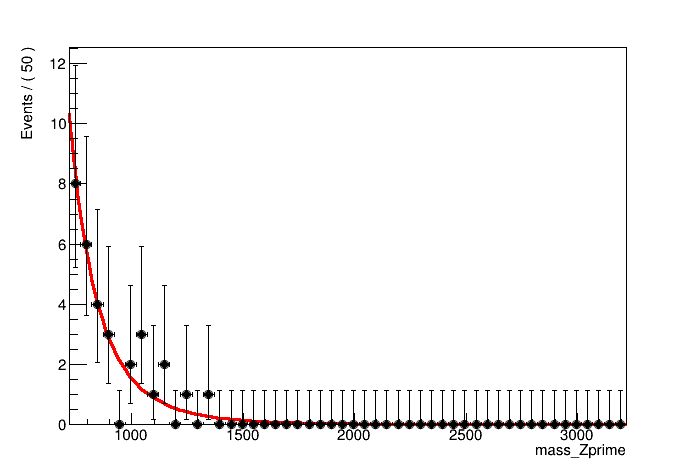

In [130]:
p0 = ROOT.RooRealVar("p0", "p0", 1e5, 0, 1e6)
p1 = ROOT.RooRealVar("p1", "p2", -10, 0.1, 10)
p2 = ROOT.RooRealVar("p2", "p2", -10, 0.1, 10)
model_background = ROOT.RooGenericPdf("model_background", "model_background", "@0 * TMath::Power(@1, (@2 + @3 * TMath::Log(@2)))", ROOT.RooArgList(p0, mass_Zprime, p1, p2))

# Fit model to data sidebands
model_background.fitTo(data_sideband, ROOT.RooFit.SumW2Error(True))
model_background.fitTo(data_sideband, ROOT.RooFit.SumW2Error(True))

# Let's plot the model fit to the data
can = ROOT.TCanvas()
plot = mass_Zprime.frame()
# We have to be careful with the normalisation as we only fit over sidebands
# First do an invisible plot of the full data set
data_sideband.plotOn(plot, binning, ROOT.RooFit.MarkerColor(0), ROOT.RooFit.LineColor(0))
model_background.plotOn(plot, ROOT.RooFit.LineColor(2))
data_sideband.plotOn(plot, binning)
plot.Draw()
can.Update()
can.Draw()
can.SaveAs("../plots/fit/model_background.pdf")

In [131]:
print('Total sideband data events:', data_sideband.sumEntries())

Total sideband data events: 31.0
